# Logistic Regression.

## Import required packages.

In [64]:
from pathlib import Path

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from mord import LogisticIT #this particualr LogisticIT used for numinal, catergorical variables

import statsmodels.api as sm

from dmba import classificationSummary, gainsChart, liftChart

%matplotlib inline
import matplotlib.pylab as plt

1. 2. Upload, explore, clean, and preprocess data.
a. Why a logistic regression model may be used in this case? Why may you not apply a
multiple linear regression model in this case? Provide brief answers to both questions.


b. Create a flight_df data frame by uploading the original data set into Python.

In [68]:
flight_df = pd.read_csv('/Users/jayasreemuchamari/Documents/Jayasreemasterstudymaterial/BAN620/Casestudy2/FlightDelays.csv')
print(flight_df.head(10))
print("Dataset dimensions:", flight_df.shape)

   SCH_TIME CARRIER  DEP_TIME DEST  DISTANCE  FL_NUM ORIGIN  WEATHER  WK_DAY  \
0      1455      OH      1455  JFK       184    5935    BWI        0       4   
1      1640      DH      1640  JFK       213    6155    DCA        0       4   
2      1245      DH      1245  LGA       229    7208    IAD        0       4   
3      1715      DH      1709  LGA       229    7215    IAD        0       4   
4      1039      DH      1035  LGA       229    7792    IAD        0       4   
5       840      DH       839  JFK       228    7800    IAD        0       4   
6      1240      DH      1243  JFK       228    7806    IAD        0       4   
7      1645      DH      1644  JFK       228    7810    IAD        0       4   
8      1715      DH      1710  JFK       228    7812    IAD        0       4   
9      2120      DH      2129  JFK       228    7814    IAD        0       4   

   MTH_DAY FL_STATUS  
0        1    ontime  
1        1    ontime  
2        1    ontime  
3        1    ontime  
4   

Remove
‘DEST’ and ‘ORIGIN’ variables from the flight_df data frame

In [71]:
flight_df = flight_df.drop(columns=['DEST', 'ORIGIN'])
print(flight_df.dtypes)

SCH_TIME      int64
CARRIER      object
DEP_TIME      int64
DISTANCE      int64
FL_NUM        int64
WEATHER       int64
WK_DAY        int64
MTH_DAY       int64
FL_STATUS    object
dtype: object


Convert ‘CARRIER’ and
‘FL_STATUS’ into binary variables. This question 1b of part 1 will not be graded.

In [74]:
"""
flight_df = pd.get_dummies(flight_df, columns=['CARRIER'], drop_first=True)
# Convert all Boolean columns to integer (binary) values (0 and 1)
flight_df = flight_df.astype({
    'CARRIER_DH': 'int64', 
    'CARRIER_DL': 'int64', 
    'CARRIER_MQ': 'int64', 
    'CARRIER_OH': 'int64', 
    'CARRIER_RU': 'int64', 
    'CARRIER_UA': 'int64', 
    'CARRIER_US': 'int64'
})
"""
flight_df = pd.get_dummies(flight_df, columns=['CARRIER'], 
                            drop_first=True)
flight_df[['CARRIER_DH','CARRIER_DL', 'CARRIER_MQ', 'CARRIER_OH',
            'CARRIER_RU', 'CARRIER_UA', 'CARRIER_US']]= \
     flight_df[['CARRIER_DH','CARRIER_DL', 'CARRIER_MQ', 'CARRIER_OH',
            'CARRIER_RU', 'CARRIER_UA', 'CARRIER_US']].astype(int)
# Convert 'FL_STATUS' to binary: 0 for 'ontime', 1 for 'delayed'
flight_df['FL_STATUS'] = flight_df['FL_STATUS'].map({'ontime':1, 'delayed': 0})

flight_df.dtypes

SCH_TIME      int64
DEP_TIME      int64
DISTANCE      int64
FL_NUM        int64
WEATHER       int64
WK_DAY        int64
MTH_DAY       int64
FL_STATUS     int64
CARRIER_DH    int64
CARRIER_DL    int64
CARRIER_MQ    int64
CARRIER_OH    int64
CARRIER_RU    int64
CARRIER_UA    int64
CARRIER_US    int64
dtype: object

c. Why does the output variable ‘FL_STATUS’ need to be converted into binary variables for
logistic regression? Briefly explain.


The output variable FL_STATUS must be converted into a binary numeric format for logistic regression because logistic regression models the probability of a binary event (e.g., delayed or not delayed) numerically. This numeric encoding (typically 0 and 1) allows the algorithm to mathematically estimate the probability of each outcome clearly and efficiently.

2.Develop a logistic regression model for the Flight Delays case.


a. Develop in Python the predictor variables (14 variables) and outcome variable
(‘FL_STATUS’) and partition the data set (80% for training and 20% for validation
partitions, random_state=1). Train a logistic regression model using LogisticRegression()
 with the training data set and display in Python the model’s parameters (intercept and
regression coefficients). Provide these parameters in your report and also present the
mathematical equation of the trained logistic regression model.

In [78]:
flight_df.head()

,SCH_TIME,DEP_TIME,DISTANCE,FL_NUM,WEATHER,WK_DAY,MTH_DAY,FL_STATUS,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US
0,1455,1455,184,5935,0,4,1,1,0,0,0,1,0,0,0
1,1640,1640,213,6155,0,4,1,1,1,0,0,0,0,0,0
2,1245,1245,229,7208,0,4,1,1,1,0,0,0,0,0,0
3,1715,1709,229,7215,0,4,1,1,1,0,0,0,0,0,0
4,1039,1035,229,7792,0,4,1,1,1,0,0,0,0,0,0


In [80]:

# Develop predictors X and output variable Y for the data set.
X = flight_df.drop(columns=['FL_STATUS'])
y = flight_df['FL_STATUS']

#Develop training (80%) and validation(20%) partitions for
# Flight data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)

# Using LogisticRegression() function, fit multiple predictors logistic 
# regression for training partition.
# solver='liblinear' is used for automated selection of the best parameters.
log_reg = LogisticRegression(solver='liblinear', C=1e42)
log_reg.fit(train_X, train_y)
# Show intercept and coefficients of the multiple predictors' logistic model.
print('Parameters of Logistic Regresion Model with Multiple Predictors')
print('Intercept:', np.round(log_reg.intercept_[0], decimals=3))
print('Coefficients for Predictors')
print(pd.DataFrame({'Coeff:': np.round(log_reg.coef_[0], decimals=3)}, 
                    index=X.columns).transpose())

Parameters of Logistic Regresion Model with Multiple Predictors
Intercept: 0.101
Coefficients for Predictors
        SCH_TIME  DEP_TIME  DISTANCE  FL_NUM  WEATHER  WK_DAY  MTH_DAY  \
Coeff:     0.027    -0.028     0.009     0.0   -0.543   0.078   -0.023   

        CARRIER_DH  CARRIER_DL  CARRIER_MQ  CARRIER_OH  CARRIER_RU  \
Coeff:       0.048       0.704      -0.823       0.383      -0.008   

        CARRIER_UA  CARRIER_US  
Coeff:       0.077      -0.039  


In [82]:
# Extract intercept and coefficients
intercept = log_reg.intercept_[0]
coefficients = log_reg.coef_[0]
print("Logistic Regression Equation:")
print(f"Logit(P) = {intercept:.3f}")
for feature, coef in zip(X.columns, coefficients):
    print(f"    + ({coef:.3f} * {feature})")


Logistic Regression Equation:
Logit(P) = 0.101
    + (0.027 * SCH_TIME)
    + (-0.028 * DEP_TIME)
    + (0.009 * DISTANCE)
    + (0.000 * FL_NUM)
    + (-0.543 * WEATHER)
    + (0.078 * WK_DAY)
    + (-0.023 * MTH_DAY)
    + (0.048 * CARRIER_DH)
    + (0.704 * CARRIER_DL)
    + (-0.823 * CARRIER_MQ)
    + (0.383 * CARRIER_OH)
    + (-0.008 * CARRIER_RU)
    + (0.077 * CARRIER_UA)
    + (-0.039 * CARRIER_US)


b. In Python, make predictions and identify probabilities p(0) and p(1) for the validation data
set. For the first 20 records in the validation data set, display a table that contains the
actual and predicted flight arrival status, and probabilities p(0) and p(1). Present this table
in your report, and comment on the predicted vs. actual flight arrival status.

In [85]:
#Make predictions for validation set using multiple
# predictors logistic regression model. 

# Predict multiple predictors logistic model's results 
# (0 or 1) for validation set.
log_pred = log_reg.predict(valid_X)

# Predict multiple predictors logistic model's probabilities 
# p(0) and p(1) for validation set.
log_prob = np.round(log_reg.predict_proba(valid_X), decimals=4)

# Create data frame to show multiple predictors logistic
# model resuts for validation set. 
log_result = pd.DataFrame({'Actual': valid_y, 
                    'Classification': log_pred,
                    'p(0)': [p[0] for p in log_prob],
                    'p(1)': [p[1] for p in log_prob]
})

print('Classification for Validation Partition')
print(log_result.head(20))

Classification for Validation Partition
      Actual  Classification    p(0)    p(1)
1276       1               1  0.1506  0.8494
1446       1               1  0.0838  0.9162
335        1               1  0.0787  0.9213
1458       1               1  0.1295  0.8705
2038       1               1  0.0995  0.9005
1314       1               1  0.0840  0.9160
389        1               1  0.1240  0.8760
1639       1               1  0.1232  0.8768
2004       1               1  0.1075  0.8925
403        1               1  0.2689  0.7311
979        1               1  0.0627  0.9373
65         1               1  0.0784  0.9216
2105       1               1  0.1416  0.8584
1162       1               1  0.1290  0.8710
572        1               1  0.2746  0.7254
1026       0               1  0.0698  0.9302
1044       1               1  0.4184  0.5816
1846       0               1  0.4410  0.5590
1005       1               1  0.1418  0.8582
1677       1               1  0.0692  0.9308


c. Identify and display in Python confusion matrices for the training and validation
partitions. Present them in your report and comment on accuracy (misclassification) rate
for both partitions and explain if there is a possibility of overfitting.

In [88]:
# Confusion matrices for multiple predictors logistic model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, log_reg.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, log_reg.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.8983)

       Prediction
Actual    0    1
     0  170  176
     1    3 1411

Validation Partition
Confusion Matrix (Accuracy 0.8934)

       Prediction
Actual   0   1
     0  35  47
     1   0 359


d. Create and display in Python the Lift chart only for ‘delayed’ flight status. For that, use
p(0) for .sort_values() and p(0) in liftChart(). Also use ncols=1 in plt.subplots() for a single
plot, and remove ax=axes[1] from liftChart(). Present this Lift chart in your report and
briefly explain what the chart demonstrates and what conclusion(s) can be made.

In [91]:
# Develop and display Gains chart and Lift chart. 

# Create a new df data frame from logit_result data frame
# that is sorted by p(1) in descending order.  
df = log_result.sort_values(by=['p(0)'], ascending=False)
print(df.head(200).to_string())

      Actual  Classification    p(0)    p(1)
1829       0               0  0.9972  0.0028
1084       0               0  0.9904  0.0096
846        0               0  0.9814  0.0186
1828       0               0  0.9789  0.0211
400        0               0  0.9765  0.0235
1602       0               0  0.9474  0.0526
1966       0               0  0.9462  0.0538
56         0               0  0.9461  0.0539
1827       0               0  0.9356  0.0644
1887       0               0  0.9337  0.0663
1138       0               0  0.9216  0.0784
885        0               0  0.9171  0.0829
1237       0               0  0.9125  0.0875
1115       0               0  0.8961  0.1039
1907       0               0  0.8872  0.1128
1118       0               0  0.8857  0.1143
1792       0               0  0.8835  0.1165
560        0               0  0.8833  0.1167
1435       0               0  0.7789  0.2211
906        0               0  0.7784  0.2216
1833       0               0  0.7764  0.2236
303       

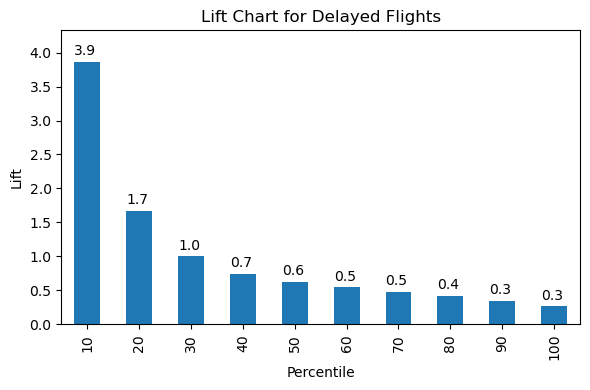

In [93]:
# Sort by probability of delayed flights (p(0))
df = log_result.sort_values(by=['p(0)'], ascending=False)

# Create a single plot (1 column layout)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

# Plot the Lift chart using p(0)
liftChart(df['p(0)'], title='Lift Chart for Delayed Flights')

# Display the chart
plt.tight_layout()
plt.show()
